In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVC


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1) (1).csv


In [ ]:
data=pd.read_csv('SalaryData_Test(1).csv')
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
data.corr()

<ipython-input-28-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


In [ ]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
le=LabelEncoder()
data['Salary']=le.fit_transform(data['Salary'])


Axes(0.125,0.11;0.775x0.77)


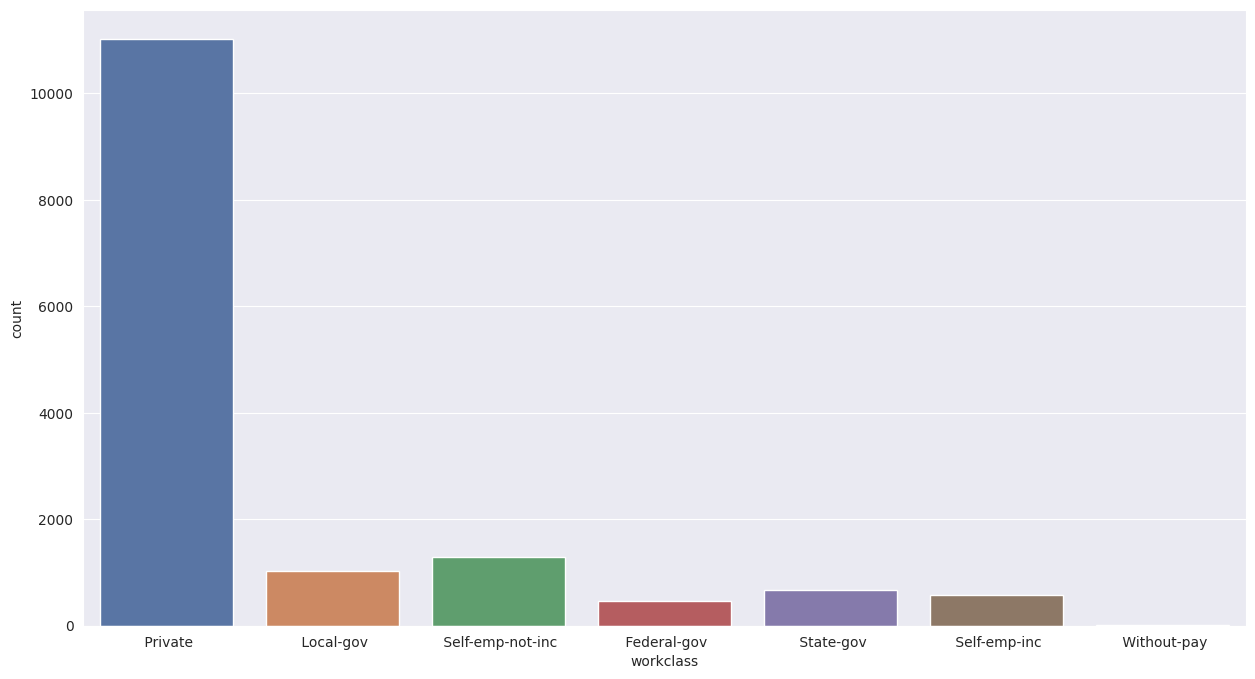

Axes(0.125,0.11;0.775x0.77)


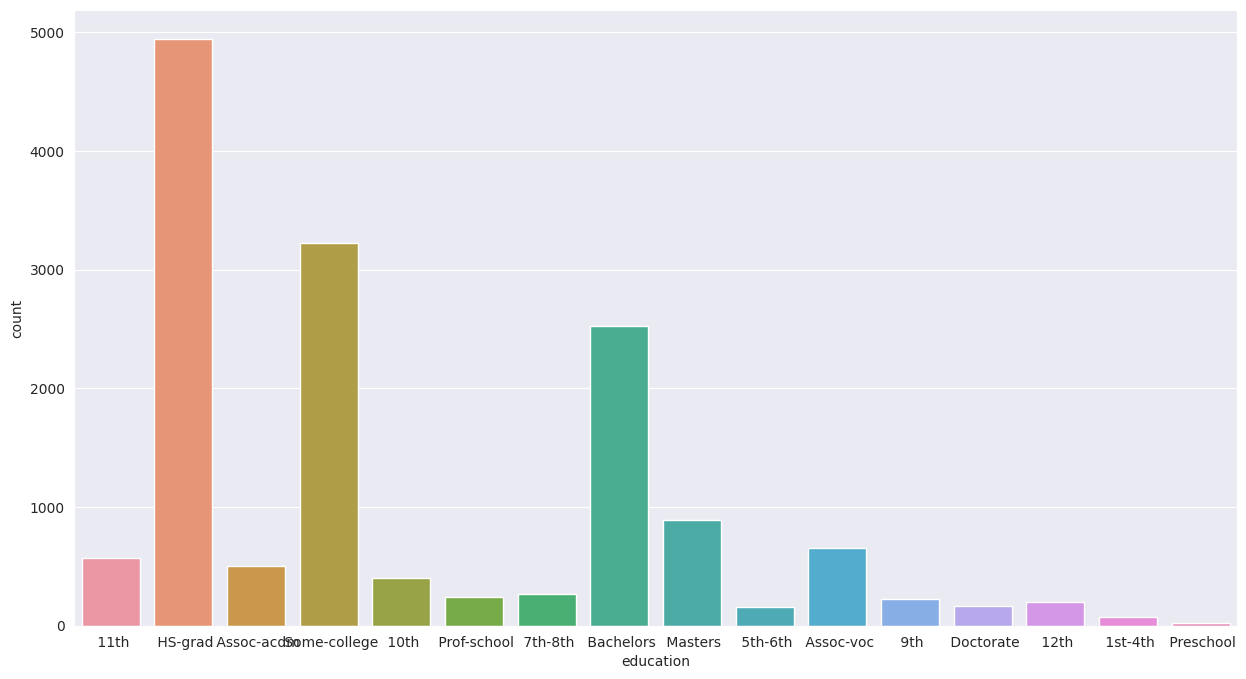

Axes(0.125,0.11;0.775x0.77)


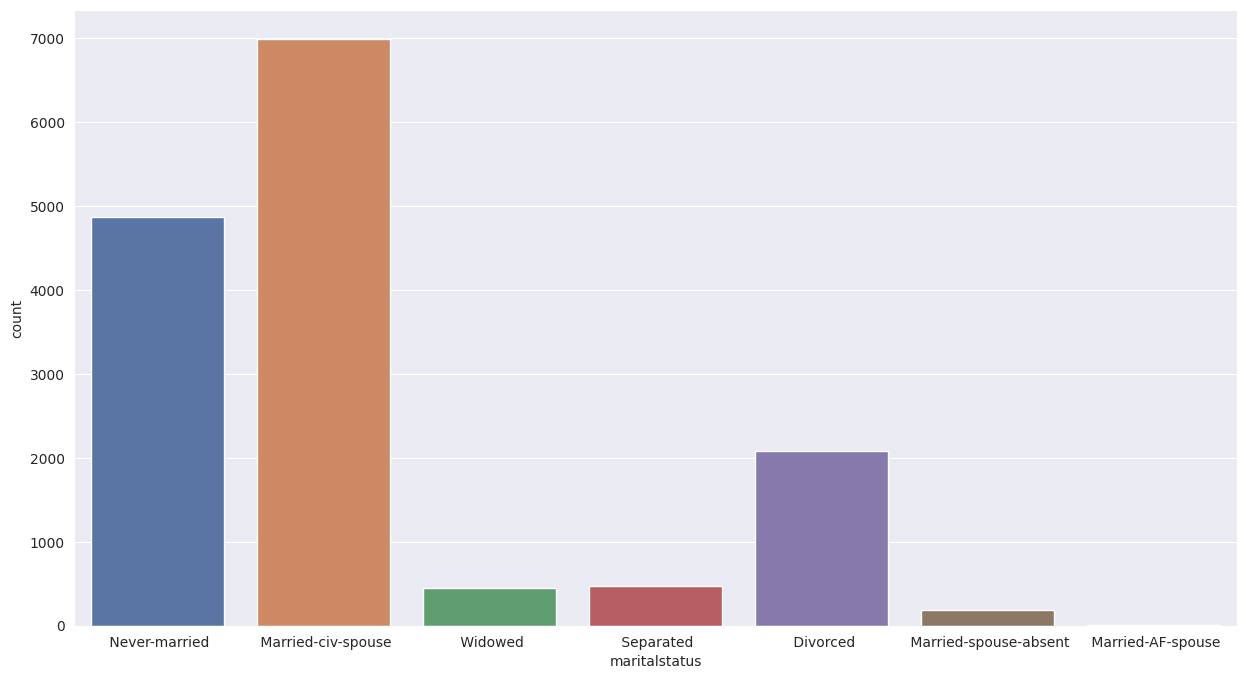

Axes(0.125,0.11;0.775x0.77)


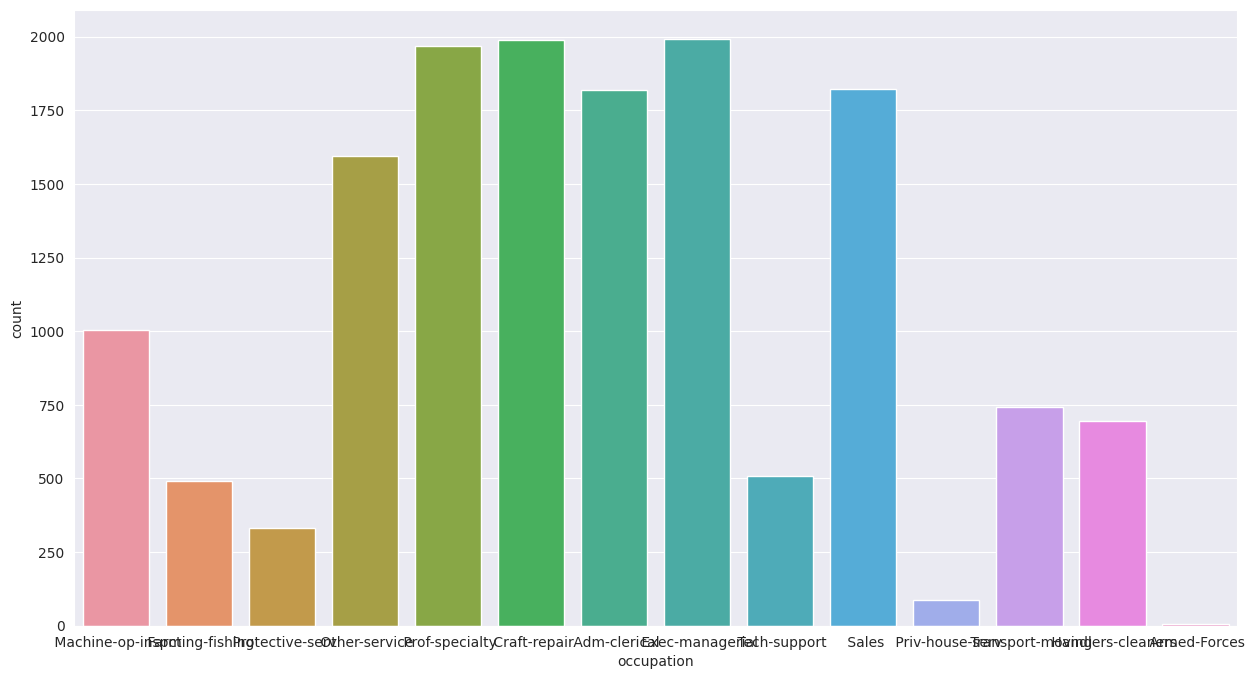

Axes(0.125,0.11;0.775x0.77)


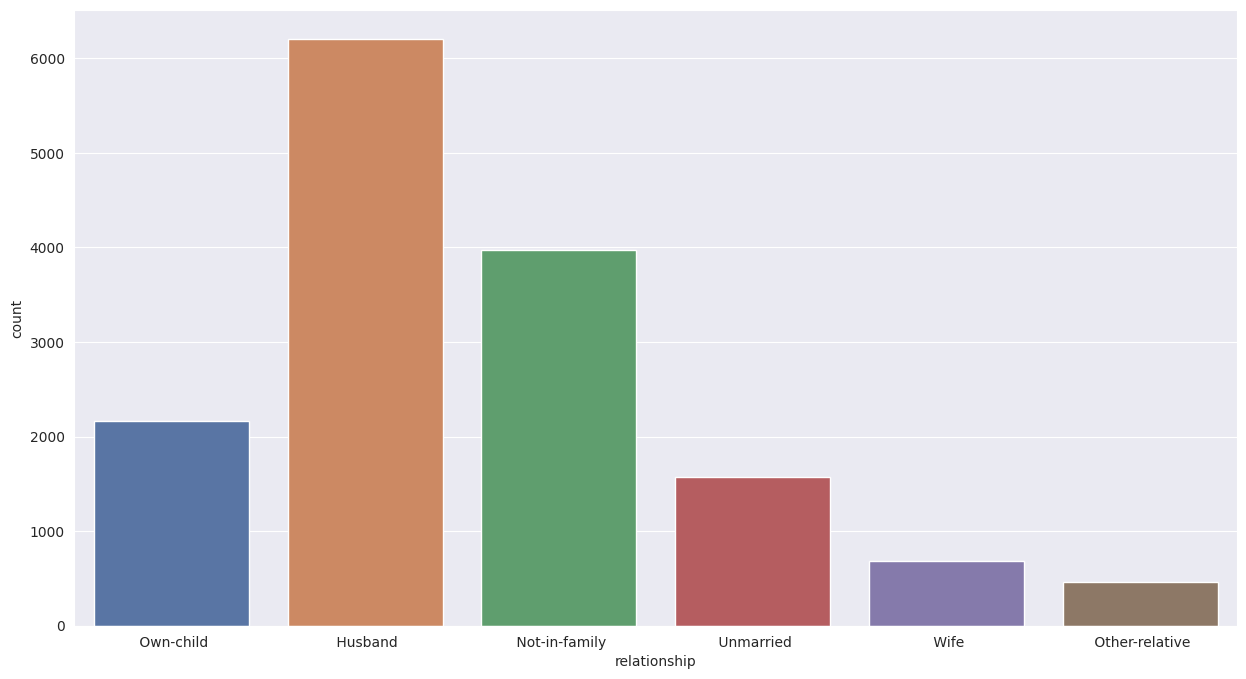

Axes(0.125,0.11;0.775x0.77)


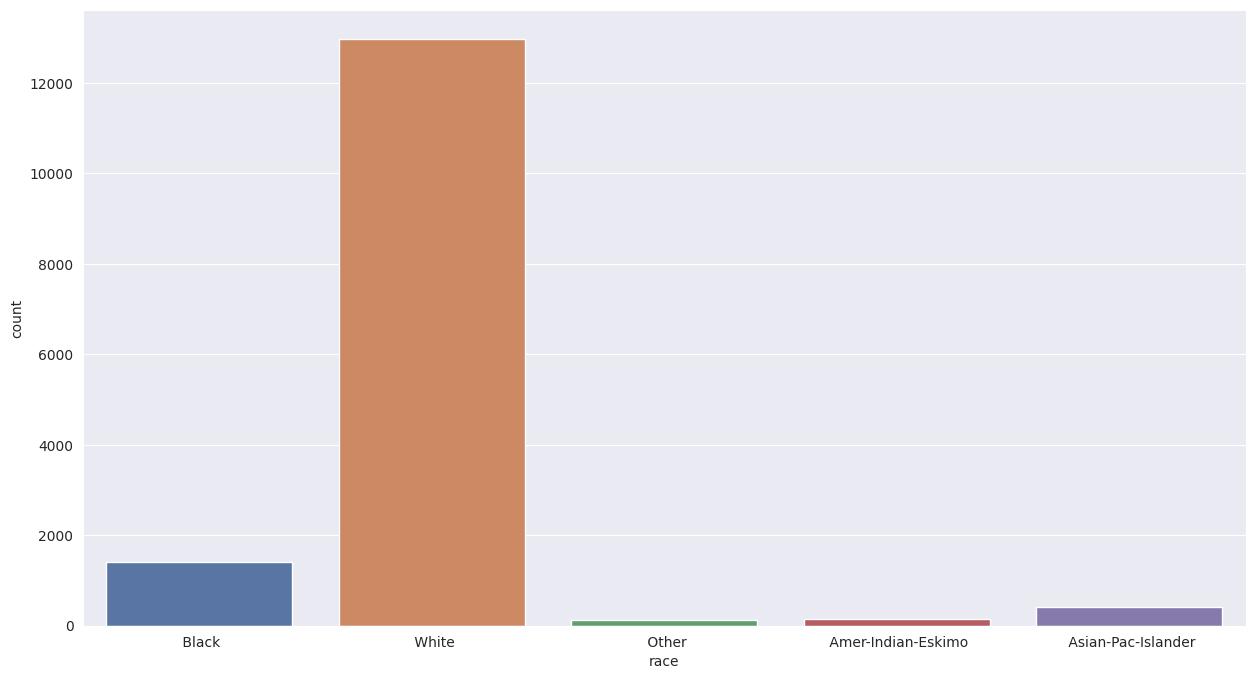

Axes(0.125,0.11;0.775x0.77)


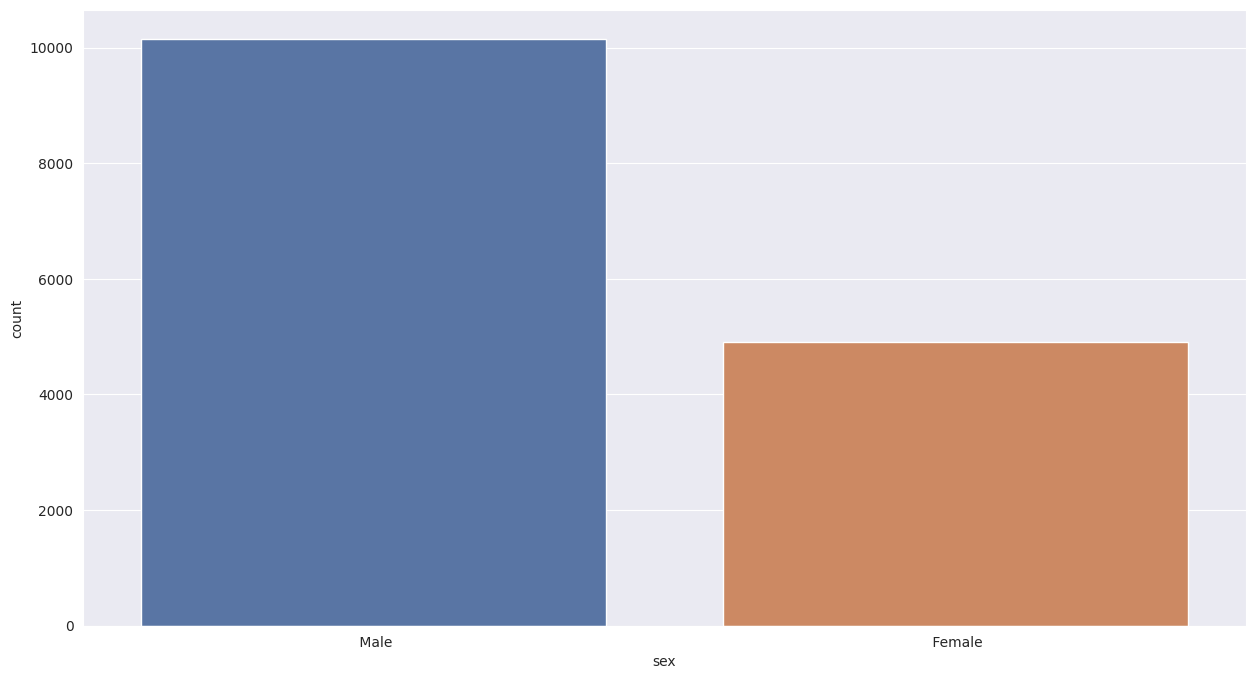

Axes(0.125,0.11;0.775x0.77)


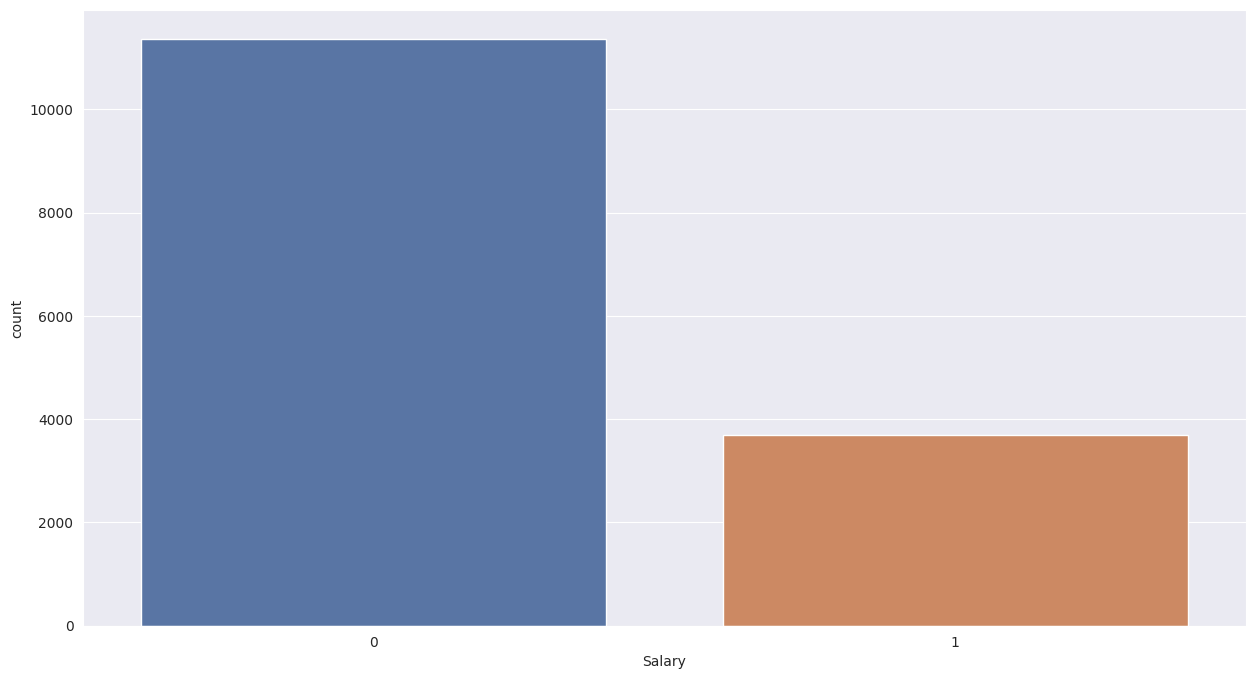

In [ ]:
columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']
sns.set({'figure.figsize':(15,8)})
for i in columns:
  plt.show()
  print(sns.countplot(x=data[i]))

<ipython-input-33-43087548a22e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capitalgain'])


<Axes: xlabel='capitalgain', ylabel='Density'>

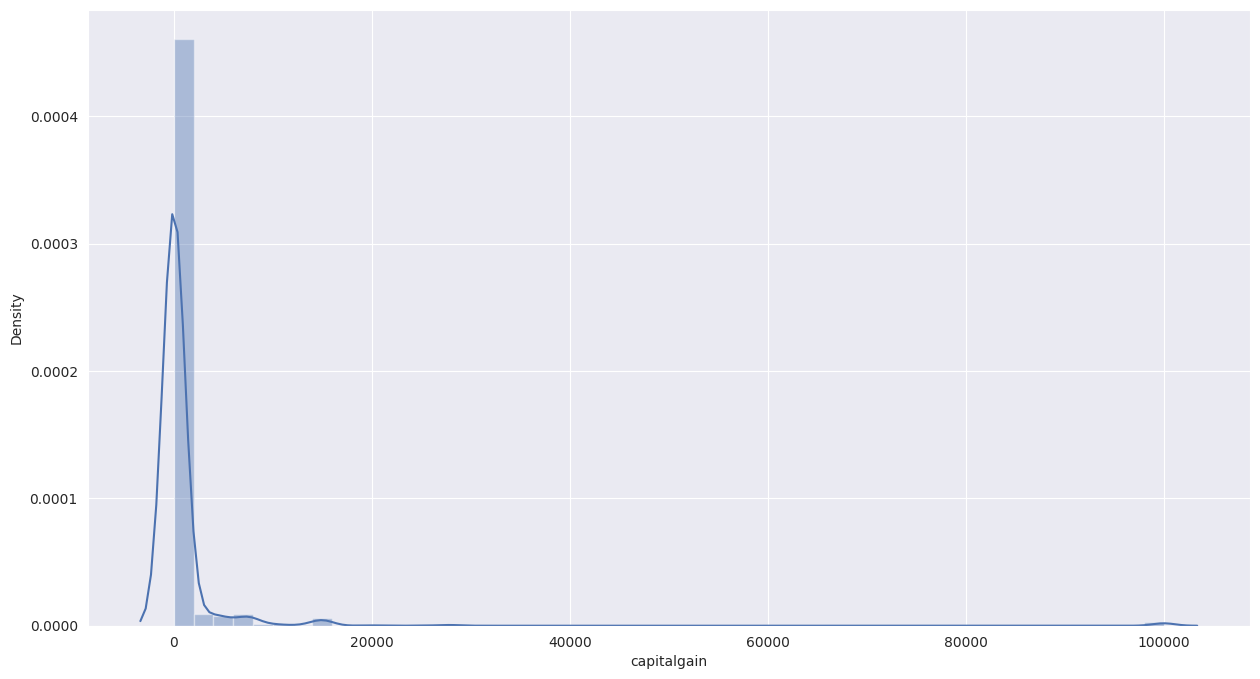

In [ ]:
sns.distplot(data['capitalgain'])

In [ ]:
columns=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native']
for i in columns:
  data[i]=le.fit_transform(data[i])
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model=SVC(kernel='linear',C=0.01,gamma=0.1)
model.fit(x_train,y_train)

SVC(C=0.01, gamma=0.1, kernel='linear')

In [ ]:
y_pred_train=model.predict(x_train)

In [ ]:
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_train


0.8014608233731739

In [ ]:
y_pred_test=model.predict(x_test)

In [ ]:
accuracy_test=accuracy_score(y_test,y_pred_test)
accuracy_test

0.8074369189907038